In [ ]:
# Nome: Leão Pereira Neto
# RA: 22200115

# Orientações para a Prova

Por favor, leia **atentamente** todas as instruções abaixo para realizar e enviar sua prova corretamente.

## Identificação

- **Preencha** seu nome e RA no bloco de código acima.

## Formato e Envio do Arquivo

- Envie o arquivo da prova com o formato `nome_sobrenome.ipynb` (sendo o primeiro sobrenome).
  
  **Exemplos:**
  
  - Nome: Ana Maria da Silva Sauro  
    Arquivo: `ana_maria_silva.ipynb`
    
  - Nome: Arthur Porfírio de Castro Siqueira  
    Arquivo: `arthur_porfirio.ipynb`
    
  - Nome: Marco Antônio Rodriges Fernandes  
    Arquivo: `marco_antonio_rodrigues.ipynb`
    
  - Nome: Flávia Melo Alcântara  
    Arquivo: `flavia_melo.ipynb`

- A prova deve ser enviada **exclusivamente** pelo formulário disponível [neste link](https://forms.gle/c5y6gW2GMSL45BTg7).

  <span style="color:red">**ATENÇÃO:**</span> A prova **NÃO** deve ser enviada para o e-mail do professor, apenas pelo formulário.

## Regras da Prova

- A prova pode ser realizada com consulta apenas em materiais das aulas anteriores ou anotações próprias.

- <span style="color:red">**Quem for pego colando terá a nota II.**</span>

- **Sem conversas paralelas** durante a prova, isto pode ser considerado cola.

- **Não** devem ser criados mais blocos de códigos que os disponíveis na prova (no desenvolvimento do código podem ser criados mais blocos de código, mas antes de enviar devem conter apenas os blocos de códigos que estavam disponíveis na prova).

- O notebook deve conter as saídas dos blocos de código referentes às questões que possuem gráficos e/ou valores que exibam as respostas (não é para limpar a saída dos blocos de código para me enviar).

## Boa Prova!

# Explicação da Prova

## Contexto

A base de dados `atraso_voos.csv` contém informações detalhadas sobre voos que foram realizados por passageiros. Cada registro (ou linha) representa o registro de **um passageiro** em um voo específico.

### Atributos da Base de Dados

Os atributos presentes na base de dados oferecem informações diversas, tais como:

- **Informações do Passageiro:** Dados específicos sobre a pessoa que realizou o voo.
  
- **Serviços Consumidos:** Detalhes sobre os serviços que foram utilizados pelo passageiro durante o voo.
  
- **Detalhes do Voo:** Informações pertinentes sobre o voo em questão.

## Objetivo da Prova

A **classe alvo**, ou seja, a variável que desejamos prever, é o **tempo de atraso para a partida** do voo.

O principal intuito desta prova é:

- Testar diferentes arquiteturas de modelos de Machine Learning.
  
- Verificar se é possível utilizar os atributos disponíveis para prever o tempo de atraso na partida dos voos utilizando técnicas de Machine Learning.
  
- Analisar o desempenho do(s) modelo(s) construído(s) com base nos dados fornecidos.

## OBS: ``Não se sabe se a base de dados possui atributos ruins e nem se só possui atributos bons.``
**Boa sorte e bom trabalho!**

# Importação de Bibliotecas

Por favor, siga as instruções abaixo com relação à importação de bibliotecas para a realização da prova.

## Orientações:

- **Centralize as Importações:** Todas as bibliotecas utilizadas devem ser importadas no bloco de código abaixo desta orientação.

- **Penalizações:**
  
  - <span style="color:red">**Menos 0.2 pontos**</span> serão descontados para cada biblioteca importada que **não for utilizada**.
    
  - <span style="color:red">**Menos 0.2 pontos**</span> serão descontados para cada biblioteca que for importada **fora do bloco de código destinado** para isso (ou seja, ao longo do código).

## Justificativa:

A organização das importações no início do notebook:
  
- Facilita a visualização das dependências do código.
  
- Previne possíveis erros de execução devido à falta de alguma biblioteca.

- Auxilia na manutenção e compreensão do código por outros desenvolvedores.

**Atenção:** Certifique-se de revisar o código antes da submissão para evitar penalizações desnecessárias.

In [2]:
# Bibliotecas utilizadas:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns  # Importando seaborn para melhorar a estética dos gráficos
from sklearn.metrics import mean_squared_error
from tensorflow.keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Questão 1: Preparação dos Dados

Nesta etapa, você deverá realizar uma série de procedimentos para preparar os dados para os modelos de Machine Learning. Siga os passos abaixo com atenção:

**Atenção:** Certifique-se de realizar cada passo com cuidado e verificar os dados em cada etapa para garantir que a preparação dos dados seja realizada corretamente.



## A. Leitura da Base de Dados

- Realize a leitura da base de dados `atraso_voos.csv`.


In [7]:
# Responda aqui
df = pd.read_csv("atraso_voos.csv")


## B. Conversão de Valores

- Converta **valores textuais** para **valores numéricos**.
  
  **Nota:** A base de dados não contém valores nulos.


In [12]:
# Responda aqui
X = df.drop('atraso_partida_minutos', axis=1)  # X
y = df[['atraso_partida_minutos']]  # y

# Convertendo categorias em variáveis numéricas
for col in df.columns:
    # Verifica se o tipo da coluna é object (textual)
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


## C. Separação dos Dados

- Separe os dados em `X` (atributos) e `y` (variável dependente).


In [14]:
# Responda aqui
scaler_X = MinMaxScaler()
X = df.drop('atraso_partida_minutos', axis = 1)
#tudo menos a classe alvo
scaler_y  = MinMaxScaler()
y = df[['atraso_partida_minutos']]
#somente a classe alvo

# Separa os dados em X e y de treinamento e temporários
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
#Aqui normalmente (vida real) se utiliza uns 30%, mas aqui para a aula, estmaos usando 50%, considerando o tamanho da base de dados

# Normaliza e ajusta o escalonizador com os dados de X de treinamento
X_train = scaler_X.fit_transform(X_train) #o escalonador se adequa a base de dados
# Normaliza e ajusta o escalonizador com os dados de y de treinamento
y_train = scaler_y.fit_transform(y_train)

# Ajusta os dados de X_temp
X_temp = scaler_X.transform(X_temp) #o transform é aplicado sem antes ajustar o transformador aos dados de teste.
# Ajusta os dados de y_temp
y_temp = scaler_y.transform(y_temp)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)


## D. Divisão dos Dados

- Divida os dados em conjuntos de treinamento (60%), validação (10%) e teste (30%) para `X` e `y`.


In [ ]:
# Responda aqui



## E. Normalização dos Dados

- Utilize a técnica de normalização **Min-Max** para normalizar os dados.
  
  - Primeiramente, aplique o método `fit_transform` nos dados de treinamento (`X_train`).
    
  - Em seguida, utilize o método `transform` nos dados de teste (`X_test`) e validação (`X_val`).


In [ ]:
# Responda aqui



# Questão 2: Construção e Avaliação do Modelo Simples

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural simples. Siga as subinstruções com atenção para cada item.


## A - Construção do Modelo

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir **10 camadas ocultas**.

- Na quinta camada oculta o modelo deve possuir 128 neurônios. (demais camadas fica ao seu critério)
  
- **Não** utilize técnicas de dropout e regularização do kernel no modelo.


In [15]:
# Responda aqui
def create_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


## B - Treinamento do Modelo

- **Crie um modelo chamdo modelo_simples** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento e validação por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.


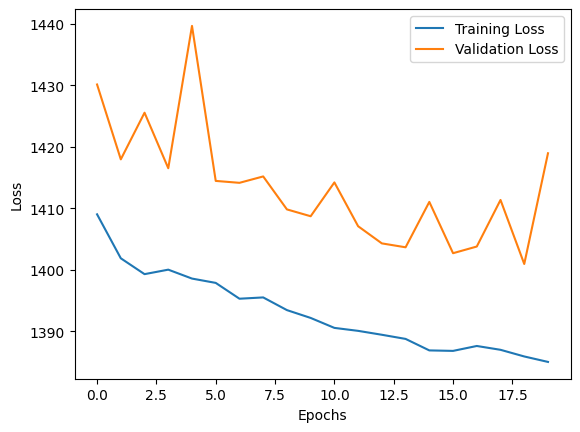

In [21]:
# Responda aqui
input_shape = X.shape[1]
model = create_model(input_shape)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
# Treinar modelo com o Early Stopping como callback
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

model
clear_output(wait=True)
train_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## C - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [30]:
# Responda aqui
# Usando o modelo para fazer previsões no conjunto de treinamento
predict = model.predict(X_train)

# Invertendo a normalização das previsões para obter os valores reais
predict = scaler_y.inverse_transform(predict)

# Invertendo a normalização dos valores reais de treinamento
real = scaler_y.inverse_transform(y_train)

# Calculando o Erro Quadrático Médio (MSE) entre os valores reais e as previsões
mse = mean_squared_error(real, predict)
r2_train = r2_score(predict, real)
# Imprimindo o MSE
print(f"Risco Empírico (MSE): {mse:.3f}")
print(f'R^2 (Treinamento): {r2_train:.4f}')

2428/2428 [==============================] - 3s 1ms/step
Risco Empírico (MSE): 2379540410.446
R^2 (Treinamento): -21.5318



## D - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [29]:
# Usando o modelo para fazer previsões no conjunto de treinamento
predict = model.predict(X_test)

# Invertendo a normalização das previsões para obter os valores reais
predict = scaler_y.inverse_transform(predict)

# Invertendo a normalização dos valores reais de treinamento
real = scaler_y.inverse_transform(y_test)

# Calculando o Erro Quadrático Médio (MSE) entre os valores reais e as previsões
mse = mean_squared_error(real, predict)
r2_test = r2_score(predict, real)
# Imprimindo o MSE
print(f"Risco Estrutural (MSE): {mse:.3f}")
print(f'R^2 (Teste): {r2_test:.4f}')

1214/1214 [==============================] - 1s 930us/step
Risco Estrutural (MSE): 2506162399.606
R^2 (Teste): -22.5542



## E - Classificação do Modelo

- Com base nos valores e gráficos anteriores, **classifique o modelo** como:
  
  - Um modelo com Overfitting
  
  - Um modelo sem overfitting

### Escreva neste bloco de markdown sua resposta

Um modelo com overfitting



## F - Justificativa

- **Justifique a sua resposta** do item 2.E, explicando os motivos que o levaram a classificar o modelo desta maneira.

Utilize **suas próprias palavras**.

Embora o MSE esteja bom, o R2 está luito longe de 1, o que indica que o modelo não está explicando bem a variação de dados

### Escreva neste bloco de markdown sua resposta


# Questão 3: Construção e Avaliação do Modelo com regularização de kernel l1, l2 ou l1 e l2

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural. Siga as subinstruções com atenção para cada item.



## A - Construção do Modelo com regularização de kernel l1, l2 ou l1 e l2

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir as mesmas **10 camadas ocultas** da questão 2.
  
- Utilize técnicas de regularização do kernel no modelo seguindo as melhores práticas de acordo com as informações dos dados.


In [31]:
# Responda aqui
def create_l1_l2_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(8, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


## B - Justificativa das escolhas dos regularizadores de kernel

- **Justifique** a utilização o l1, l2 ou o Elastic Net (l1 e l2 juntos).

- **Justifique** a utilização do regularizador de kernel nas camadas que foram aplicadas.

### Escreva neste bloco de markdown sua resposta

Usei nas camads do meio para tornar o modelo mais simples, pois se está com overfitting, seria interessante causar um pouco de simplificação para as metricas baixarem e equalizar o modelo


## C - Treinamento do Modelo

- **Crie um modelo chamdo modelo_reg_ker** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.


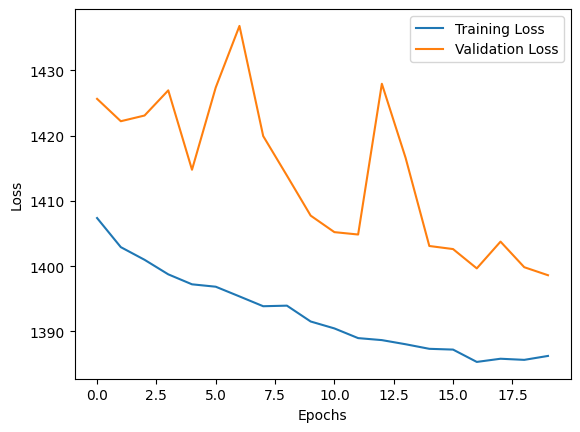

In [32]:
# Responda aqui
def modelo_reg_ker(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(8, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
input_shape = X.shape[1]
model = modelo_reg_ker(input_shape)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
# Treinar modelo com o Early Stopping como callback
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

model
clear_output(wait=True)
train_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



## D - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [33]:
# Responda aqui
# Usando o modelo para fazer previsões no conjunto de treinamento
predict = model.predict(X_train)

# Invertendo a normalização das previsões para obter os valores reais
predict = scaler_y.inverse_transform(predict)

# Invertendo a normalização dos valores reais de treinamento
real = scaler_y.inverse_transform(y_train)

# Calculando o Erro Quadrático Médio (MSE) entre os valores reais e as previsões
mse = mean_squared_error(real, predict)
r2_train = r2_score(predict, real)
# Imprimindo o MSE
print(f"Risco Empírico (MSE): {mse:.3f}")
print(f'R^2 (Treinamento): {r2_train:.4f}')

2428/2428 [==============================] - 3s 947us/step
Risco Empírico (MSE): 2351625475.715
R^2 (Treinamento): -71.2571



## E - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [34]:
# Responda aqui
# Usando o modelo para fazer previsões no conjunto de treinamento
predict = model.predict(X_test)

# Invertendo a normalização das previsões para obter os valores reais
predict = scaler_y.inverse_transform(predict)

# Invertendo a normalização dos valores reais de treinamento
real = scaler_y.inverse_transform(y_test)

# Calculando o Erro Quadrático Médio (MSE) entre os valores reais e as previsões
mse = mean_squared_error(real, predict)
r2_test = r2_score(predict, real)
# Imprimindo o MSE
print(f"Risco Estrutural (MSE): {mse:.3f}")
print(f'R^2 (Teste): {r2_test:.4f}')

1214/1214 [==============================] - 2s 2ms/step
Risco Estrutural (MSE): 2480100941.461
R^2 (Teste): -74.3900


# Questão 4: Construção e Avaliação do Modelo com Dropout

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural. Siga as subinstruções com atenção para cada item.



## A - Construção do Modelo com regularização a utilização do Dropout

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir as mesmas **10 camadas ocultas** da questão 2.
  
- Utilize técnicas de dropout no modelo seguindo as melhores práticas de acordo com as informações dos dados.


In [36]:
# Responda aqui
def create_dropout_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    return model

## B - Justificativa do Dropout

- **Justifique** a utilização a localização do dropout.

### Escreva neste bloco de markdown sua resposta
utilizei nas camadas com mais neuronios para tentar mitigar o overfitting


## C - Treinamento do Modelo

- **Crie um modelo chamdo modelo_dropout** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.

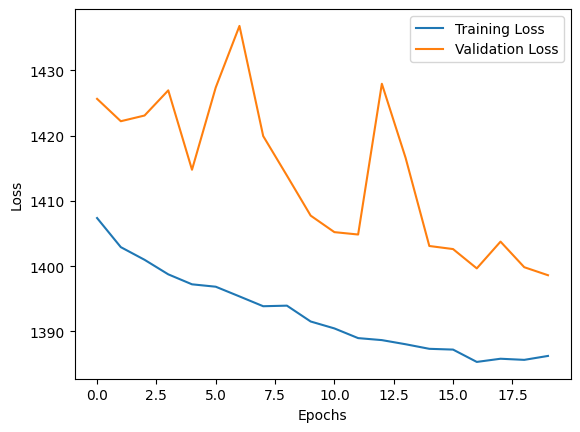

In [43]:
from keras.src.callbacks import optimizer
# Responda aqui
input_shape = X.shape[1]
model = create_dropout_model(input_shape)
# Treinar modelo com o Early Stopping como callback
model.compile(optimizer="Adam", loss='mse')
history_dropout = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)


model
clear_output(wait=True)
train_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## D - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [44]:
# Responda aqui
# Usando o modelo para fazer previsões no conjunto de treinamento
predict = model.predict(X_train)

# Invertendo a normalização das previsões para obter os valores reais
predict = scaler_y.inverse_transform(predict)

# Invertendo a normalização dos valores reais de treinamento
real = scaler_y.inverse_transform(y_train)

# Calculando o Erro Quadrático Médio (MSE) entre os valores reais e as previsões
mse = mean_squared_error(real, predict)
r2_train = r2_score(predict, real)
# Imprimindo o MSE
print(f"Risco Empírico (MSE): {mse:.3f}")
print(f'R^2 (Treinamento): {r2_train:.4f}')


2428/2428 [==============================] - 3s 1ms/step
Risco Empírico (MSE): 2358461689.535
R^2 (Treinamento): -58.2193



## E - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [45]:
# Responda aqui
# Usando o modelo para fazer previsões no conjunto de treinamento
predict = model.predict(X_test)

# Invertendo a normalização das previsões para obter os valores reais
predict = scaler_y.inverse_transform(predict)

# Invertendo a normalização dos valores reais de treinamento
real = scaler_y.inverse_transform(y_test)

# Calculando o Erro Quadrático Médio (MSE) entre os valores reais e as previsões
mse = mean_squared_error(real, predict)
r2_test = r2_score(predict, real)
# Imprimindo o MSE
print(f"Risco Estrutural (MSE): {mse:.3f}")
print(f'R^2 (Teste): {r2_test:.4f}')

1214/1214 [==============================] - 1s 948us/step
Risco Estrutural (MSE): 2486373344.260
R^2 (Teste): -61.0130


# Questão 5: Separação da Base de Treinamento

Divida o conjunto de dados de treinamento em 4 subconjuntos, cada um contendo 25% dos dados originais de treinamento.

## Instruções

- Divida a base de treinamento (`X_train` e `y_train`) em 4 subconjuntos, cada um com 25% dos dados.

- Nomeie os subconjuntos como `X_train_1`, `y_train_1`, `X_train_2`, `y_train_2`, e assim por diante.

In [48]:
# Responda aqui
# Divida a base de treinamento em 4 subconjuntos
X_train_splits = []
y_train_splits = []

# Supondo que você tem X_train e y_train como dados de treinamento normalizados
for _ in range(4):
    X_split, _, y_split, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    X_train_splits.append(X_split)
    y_train_splits.append(y_split)

# Inicialize listas para armazenar os resultados
mse_train_results = []
mse_test_results = []

# Loop através dos 4 subconjuntos e treine o modelo
for i in range(4):
    # Treine o modelo com o subconjunto i
    model.fit(X_train_splits[i], y_train_splits[i], epochs=20, batch_size=32, verbose=0)

    # Faça previsões nos dados de treinamento e teste
    y_train_pred_normalized = model.predict(X_train_splits[i])
    y_test_pred_normalized = model.predict(X_test)

    # Desnormalize as previsões
    y_train_pred = scaler_y.inverse_transform(y_train_pred_normalized)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_normalized)

    # Calcule o MSE para dados de treinamento e teste e armazene-os
    mse_train = mean_squared_error(y_train_splits[i], y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mse_train_results.append(mse_train)
    mse_test_results.append(mse_test)

# Exiba os resultados do MSE para os 4 modelos
for i in range(4):
    print(f'MSE (Treinamento - Modelo {i + 1}): {mse_train_results[i]:.4f}')
    print(f'MSE (Teste - Modelo {i + 1}): {mse_test_results[i]:.4f}')
    print()

1214/1214 [==============================] - 1s 924us/step
MSE (Treinamento - Modelo 1): 330858984.9849
MSE (Teste - Modelo 1): 332379226.8641

MSE (Treinamento - Modelo 2): 321675203.7268
MSE (Teste - Modelo 2): 322705257.3008

MSE (Treinamento - Modelo 3): 354656331.9200
MSE (Teste - Modelo 3): 355807002.6948

MSE (Treinamento - Modelo 4): 277195966.8779
MSE (Teste - Modelo 4): 277985416.6134



# Questão 6: Seleção e Treinamento de Modelos

Nesta questão, você irá selecionar o melhor dos 3 modelos com base nas questões anteriores.



## A - Seleção e Instanciação do Modelo

- **Selecione o melhor modelo** com base nos experimentos e métricas observadas nas questões anteriores.
- **Crie 4 instâncias** deste modelo utilizando a função correspondente.

```python
# Supondo que o melhor modelo seja 'create_model_dropout'
modelo_dropout_1 = create_model_dropout()
modelo_dropout_2 = create_model_dropout()
modelo_dropout_3 = create_model_dropout()
modelo_dropout_4 = create_model_dropout()


In [ ]:
# Responda aqui


## B - Treinamento do Modelo 1 e Visualização do Gráfico

- **Treine o modelo 1** por 20 épocas utilizando `X_train_1` e `y_train_1`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

In [ ]:
# Responda aqui


## C - Treinamento do Modelo 2 e Visualização do Gráfico

- **Treine o modelo 2** por 20 épocas utilizando `X_train_2` e `y_train_2`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

In [ ]:
# Responda aqui


## D - Treinamento do Modelo 3 e Visualização do Gráfico

- **Treine o modelo 3** por 20 épocas utilizando `X_train_3` e `y_train_3`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

In [ ]:
# Responda aqui


## E - Treinamento do Modelo 4 e Visualização do Gráfico

- **Treine o modelo 4** por 20 épocas utilizando `X_train_4` e `y_train_4`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

In [ ]:
# Responda aqui


## Questão 7: Erros dos Modelos


## A: Erro Estrutural dos Modelos

Nesta etapa, você deverá calcular e exibir o erro estrutural para cada um dos 4 modelos treinados na questão anterior. Lembre-se de que o erro estrutural deve ser calculado utilizando o conjunto de treinamento específico que foi usado para treinar cada modelo.

### Instruções:

- Calcule o erro estrutural para o `modelo_1` utilizando `X_train_1` e `y_train_1`.
- Calcule o erro estrutural para o `modelo_2` utilizando `X_train_2` e `y_train_2`.
- Calcule o erro estrutural para o `modelo_3` utilizando `X_train_3` e `y_train_3`.
- Calcule o erro estrutural para o `modelo_4` utilizando `X_train_4` e `y_train_4`.

### Nota:

Certifique-se de que os cálculos estão corretos (desnormalizados) e refletem o desempenho dos modelos nos dados com os quais foram treinados. Utilize métricas de erro apropriadas para avaliar o desempenho dos modelos e apresente os resultados de forma clara e concisa.

In [ ]:
# Responda aqui


## B: Erro Empírico dos Modelos

Nesta seção, você será solicitado a calcular e apresentar o erro empírico para cada um dos 4 modelos treinados anteriormente. É crucial lembrar que o erro empírico deve ser calculado utilizando o conjunto de teste, que é o mesmo para todos os 4 modelos.

### Instruções:

- Calcule o erro empírico para o `modelo_1` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_2` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_3` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_4` utilizando o conjunto de teste (`X_test` e `y_test`).

### Nota:

Assegure-se de que os cálculos estejam corretos (desnormalizados) e que reflitam adequadamente o desempenho dos modelos no conjunto de teste. Utilize métricas de erro apropriadas para avaliar o desempenho dos modelos e apresente os resultados de maneira clara e concisa.

In [ ]:
# Responda aqui


## Questão 8: Flexibilidade do Modelo

Nesta questão, você deverá avaliar e justificar se o modelo selecionado é flexível.

### Instruções:

- **Avalie** se o modelo escolhido é flexível.
- **Justifique** sua resposta, considerando aspectos como a capacidade do modelo de se adaptar a diferentes formas dos dados, a complexidade do modelo, entre outros aspectos relevantes.

**Nota:** Sua justificativa deve ser embasada em aspectos técnicos e nas observações feitas durante o treinamento e avaliação do modelo. Lembre-se de que a flexibilidade do modelo está relacionada à sua capacidade de aprender e adaptar-se a diferentes padrões nos dados.

### Escreva neste bloco de markdown sua resposta

Considerando a consistencia do erro e a não varação drastica dos modelos, posso supor que temos uma flexibilidade entre os subconjuntos.

## Questão 9: Visualização Gráfica do melhor dos 4 modelos

Nesta questão, você deverá:

- **Selecionar o melhor modelo** dentre os modelos simples, com regularização de kernel e com dropout (O melhor modelo selecionado anteriormente).
- **Gerar previsões** para o conjunto de teste.
- **Gerar um gráfico de linha** com uma comparação entre os 200 primeiros valores reais e os preditos no conjunto de teste.


**Nota:** Certifique-se de desnormalizar os valores antes de gerar o gráfico

In [ ]:
# Responda aqui


## Questão 10: Análise dos Resultados para a Questão Principal da Prova

Nesta questão, você será solicitado a realizar uma análise crítica dos resultados obtidos e relacioná-los com a questão principal da prova.

**Nota:** Suas respostas devem ser bem fundamentadas, utilizando como base os conhecimentos técnicos adquiridos durante o curso e as observações feitas durante a realização da prova.


#### A - Análise de Underfitting
- **Analise** o gráfico gerado na questão anterior e as métricas do modelo selecionado.
- **Responda**: O modelo apresenta underfitting?
- **Justifique** sua resposta com base em suas observações e conhecimento técnico.

### Escreva neste bloco de markdown sua resposta



#### B - Relevância dos Atributos para Previsão
- **Refletindo** sobre a questão principal da prova, considere os atributos presentes na base de dados.
- **Responda**: Os atributos disponíveis parecem ser suficientemente relevantes para prever o tempo de atraso dos voos?
- **Não** precisa Justificar a resposta.

### Escreva neste bloco de markdown sua resposta
